# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


In [5]:
len(cities)

573

In [6]:
lat_long=list(zip(lats,lngs))
lat_long

[(-47.52185155812276, 138.92052659640854),
 (74.82713787304621, -109.01563175041382),
 (5.244882942853707, 92.96884997253369),
 (36.59401842676638, -164.1532332647885),
 (-83.13593332646732, 88.23511585916935),
 (60.565244850733905, 119.05190012308736),
 (79.24625096432328, -80.3380459277571),
 (-22.42008076582171, 174.29118665414467),
 (18.510770697560716, 62.482695230831126),
 (87.5836333264877, -59.63283360686495),
 (3.3384671289927184, 45.995847773367075),
 (35.504953539859486, -2.009465818603786),
 (55.72566706783812, 152.79767122870282),
 (28.1585433691197, 41.97907206283509),
 (41.46515746961646, -8.964612943739724),
 (89.17009895261359, -22.760835684195712),
 (-72.98407517058902, -146.08892175548493),
 (89.93395630195425, 123.95479804617912),
 (61.31562127166006, 110.29529418083649),
 (42.272965493002374, 14.397098336544872),
 (41.78873224473631, -128.63498543966293),
 (26.452306450128788, 156.15154755758505),
 (-8.134677763495361, 96.09477116109315),
 (-28.519794634124644, -13

In [7]:
latitude_longitude_df = pd.DataFrame(lat_long, columns = ["Latitude","Longitude"])
latitude_longitude_df

,Latitude,Longitude
0,-47.521852,138.920527
1,74.827138,-109.015632
2,5.244883,92.968850
3,36.594018,-164.153233
4,-83.135933,88.235116
...,...,...
1495,-32.568168,-37.723231
1496,-16.299126,-151.476892
1497,68.691394,-172.889493
1498,49.288974,-88.611806


In [8]:
Cities_df = pd.DataFrame(cities)
Cities_df.columns = ["City"]
Cities_df

,City
0,new norfolk
1,yellowknife
2,banda aceh
3,kapaa
4,busselton
...,...
568,kassala
569,fonte boa
570,atherton
571,corinto


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE

units = "metric"

city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

city_weather = requests.get(city_url)    # YOUR CODE HERE
response_json = city_weather.json()

response_json


{'coord': {'lon': 54.0924, 'lat': 17.0151},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 23.73,
  'feels_like': 23.67,
  'temp_min': 23.73,
  'temp_max': 23.73,
  'pressure': 1019,
  'humidity': 58,
  'sea_level': 1019,
  'grnd_level': 1018},
 'visibility': 10000,
 'wind': {'speed': 3.38, 'deg': 116, 'gust': 3.72},
 'clouds': {'all': 67},
 'dt': 1674543271,
 'sys': {'country': 'OM', 'sunrise': 1674528981, 'sunset': 1674569670},
 'timezone': 14400,
 'id': 286621,
 'name': 'Salalah',
 'cod': 200}

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE

units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units  # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)    # YOUR CODE HERE
        response_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (response_json["coord"]["lat"]) # YOUR CODE HERE
        city_lng = (response_json["coord"]["lon"]) # YOUR CODE HERE
        city_max_temp = (response_json["main"]["temp_max"]) # YOUR CODE HERE
        city_humidity = (response_json["main"]["humidity"]) # YOUR CODE HERE
        city_clouds = (response_json["clouds"]["all"]) # YOUR CODE HERE
        city_wind = (response_json["wind"]["speed"]) # YOUR CODE HERE
        city_country = (response_json["sys"]["country"]) # YOUR CODE HERE
        city_date = (response_json["dt"]) # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | banda aceh
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | suntar
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | sur
Processing Record 10 of Set 1 | narsaq
Processing Record 11 of Set 1 | mahadday weyne
City not found. Skipping...
Processing Record 12 of Set 1 | melilla
Processing Record 13 of Set 1 | sobolevo
Processing Record 14 of Set 1 | sakakah
Processing Record 15 of Set 1 | agucadoura
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | yerbogachen
Processing Record 20 of Set 1 | lanciano
Processing Record 21 of Set 1 | eureka
Processing Record 22 of Se

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          531
Lat           531
Lng           531
Max Temp      531
Humidity      531
Cloudiness    531
Wind Speed    531
Country       531
Date          531
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,23.72,58,51,1.79,AU,1674543271
1,yellowknife,62.4560,-114.3525,-14.69,85,100,4.63,CA,1674543271
2,banda aceh,5.5577,95.3222,27.18,77,78,7.16,ID,1674543271
3,kapaa,22.0752,-159.3190,22.99,88,20,2.34,US,1674543272
4,busselton,-33.6500,115.3333,27.88,41,0,9.41,AU,1674543038


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,23.72,58,51,1.79,AU,1674543271
1,yellowknife,62.4560,-114.3525,-14.69,85,100,4.63,CA,1674543271
2,banda aceh,5.5577,95.3222,27.18,77,78,7.16,ID,1674543271
3,kapaa,22.0752,-159.3190,22.99,88,20,2.34,US,1674543272
4,busselton,-33.6500,115.3333,27.88,41,0,9.41,AU,1674543038


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

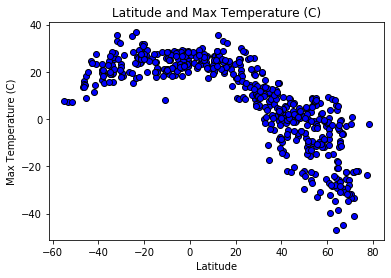

In [15]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

x_axis=[city_data_df["Lat"]]
y_axis=[city_data_df["Max Temp"]]


plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude and Max Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.gcf

# Save the figure
plt.savefig("output_data/Fig1.png", dpi=100)

# Show plot
plt.show()

#### Latitude Vs. Humidity

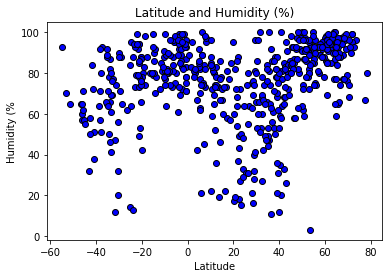

In [16]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
x_axis=[city_data_df["Lat"]]
y_axis=[city_data_df["Humidity"]]


plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude and Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%")
plt.gcf

# Save the figure
plt.savefig("output_data/Fig2.png", dpi=100)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

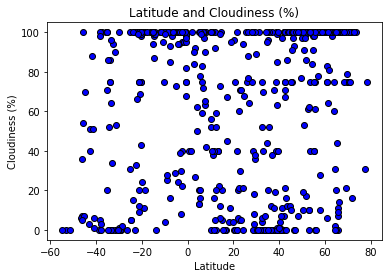

In [17]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

x_axis=[city_data_df["Lat"]]
y_axis=[city_data_df["Cloudiness"]]


plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude and Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.gcf

# Save the figure
plt.savefig("output_data/Fig3.png", dpi=100)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

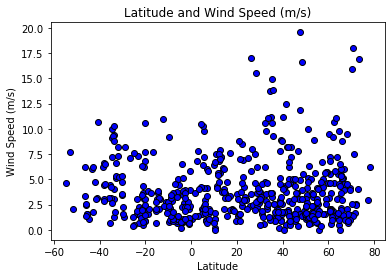

In [18]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
x_axis=[city_data_df["Lat"]]
y_axis=[city_data_df["Wind Speed"]]


plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude and Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.gcf

# Save the figure
plt.savefig("output_data/Fig4.png", dpi=100)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, : ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,-14.69,85,100,4.63,CA,1674543271
2,banda aceh,5.5577,95.3222,27.18,77,78,7.16,ID,1674543271
3,kapaa,22.0752,-159.3190,22.99,88,20,2.34,US,1674543272
5,suntar,62.1444,117.6319,-28.33,92,100,1.86,RU,1674543272
6,qaanaaq,77.4840,-69.3632,-23.62,67,31,2.96,GL,1674543128


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, : ]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,23.72,58,51,1.79,AU,1674543271
4,busselton,-33.6500,115.3333,27.88,41,0,9.41,AU,1674543038
7,isangel,-19.5500,169.2667,28.25,80,100,1.93,VU,1674543273
14,mataura,-46.1927,168.8643,16.03,57,7,2.42,NZ,1674543275
20,bengkulu,-3.8004,102.2655,24.74,92,100,6.54,ID,1674543074


###  Temperature vs. Latitude Linear Regression Plot

In [22]:
Northern_lat = northern_hemi_df.iloc[:,1]
Northern_max_temp = northern_hemi_df.iloc[:,3]
correlation = st.pearsonr(Northern_lat,Northern_max_temp)
print(f"The correlation between North Hemisphere Latitude and Max Temperature (C) is {round(correlation[0],2)}")

The correlation between North Hemisphere Latitude and Max Temperature (C) is -0.84


The r-squared is: 0.7090162535951865


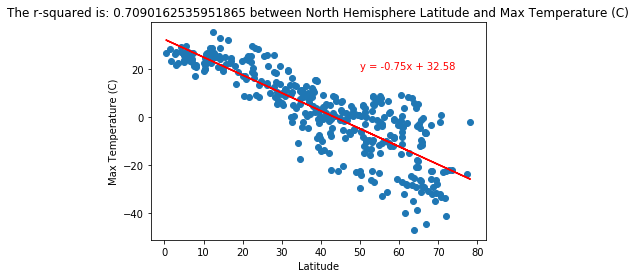

In [23]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = (Northern_lat)
y_values = (Northern_max_temp)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"The r-squared is: {rvalue**2} between North Hemisphere Latitude and Max Temperature (C)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig5.png", dpi=100)
plt.show()

In [24]:
Southern_lat = southern_hemi_df.iloc[:,1]
Southern_max_temp = southern_hemi_df.iloc[:,3]
correlation = st.pearsonr(Southern_lat,Southern_max_temp)
print(f"The correlation between Southern Hemisphere Latitude and Max Temperature (C) is {round(correlation[0],2)}")

The correlation between Southern Hemisphere Latitude and Max Temperature (C) is 0.4


The r-squared is: 0.15845149747422807


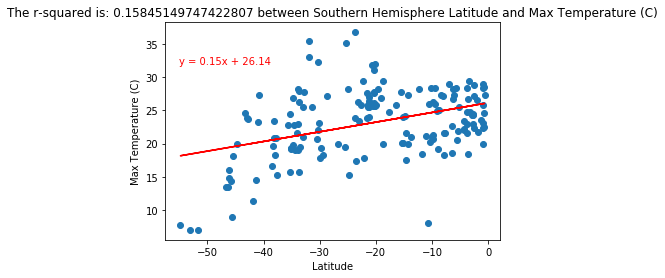

In [25]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = (Southern_lat)
y_values = (Southern_max_temp)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,32),color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"The r-squared is: {rvalue**2} between Southern Hemisphere Latitude and Max Temperature (C)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig6.png", dpi=100)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-squared between North Hemisphere Latitude and Max Temperature (C) is: 0.7090162535951865. This value indicates that about ~71% of the values for the dependent variable, Max Temperature (C), are close to the regression line, showing a strong correlation i.e. as latitude increases North of the equator, Max Temperature decreases, which is an expected relationship.

The r-squared between Southern Hemisphere Latitude and Max Temperature (C) is: 0.15845149747422807. This value indicates that about ~16% of the values for the dependent variable, Max Temperature (C), are close to the regression line, showing a small correlation i.e. as latitude increases South of the equator, Max Temperature decreases, which is an expected relationship.

### Humidity vs. Latitude Linear Regression Plot

In [26]:
Northern_lat = northern_hemi_df.iloc[:,1]
Northern_humidity = northern_hemi_df.iloc[:,4]
correlation = st.pearsonr(Northern_lat,Northern_humidity)
print(f"The correlation between North Hemisphere Latitude and Humidity (%) is {round(correlation[0],2)}")

The correlation between North Hemisphere Latitude and Humidity (%) is 0.38


The r-squared is: 0.14640045452866257


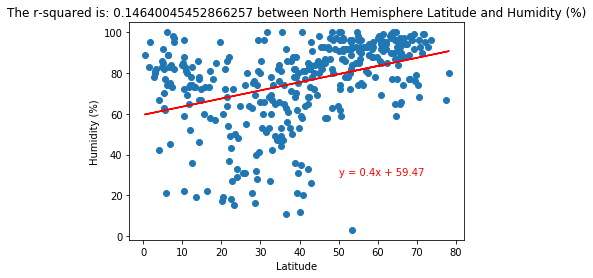

In [27]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = (Northern_lat)
y_values = (Northern_humidity)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"The r-squared is: {rvalue**2} between North Hemisphere Latitude and Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig7.png", dpi=100)
plt.show()

In [28]:
Southern_lat = southern_hemi_df.iloc[:,1]
Southern_humidity = southern_hemi_df.iloc[:,4]
correlation = st.pearsonr(Southern_lat,Southern_humidity)
print(f"The correlation between Southern Hemisphere Latitude and Humidity (%) is {round(correlation[0],2)}")

The correlation between Southern Hemisphere Latitude and Humidity (%) is 0.46


The r-squared is: 0.21538786041183416


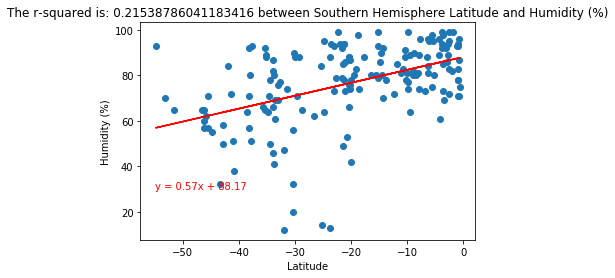

In [29]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = (Southern_lat)
y_values = (Southern_humidity)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"The r-squared is: {rvalue**2} between Southern Hemisphere Latitude and Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig8.png", dpi=100)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-squared between North Hemisphere Latitude and Humidity (%) is: 0.14640045452866257. This value indicates that about ~15% of the values for the dependent variable, Humidity (%), are close to the regression line, showing a small correlation i.e. as latitude increases North of the equator, Humidity (%) increases. This was not what i would have expected as one would have thought there would be higher humidity near the equator.

The r-squared between Southern Hemisphere Latitude and Humidity (%) is: 0.21538786041183416. This value indicates that about ~22% of the values for the dependent variable, Humidity (%), are close to the regression line, showing a small correlation i.e. as latitude increases South of the equator, Humidity (%) decreases. This is an expected relationship as one would expect there to be higher humidity near the equator.

### Cloudiness vs. Latitude Linear Regression Plot

In [30]:
Northern_lat = northern_hemi_df.iloc[:,1]
Northern_cloudiness = northern_hemi_df.iloc[:,5]
correlation = st.pearsonr(Northern_lat,Northern_cloudiness)
print(f"The correlation between North Hemisphere Latitude and Cloudiness (%) is {round(correlation[0],2)}")

The correlation between North Hemisphere Latitude and Cloudiness (%) is 0.27


The r-squared is: 0.07281549572384327


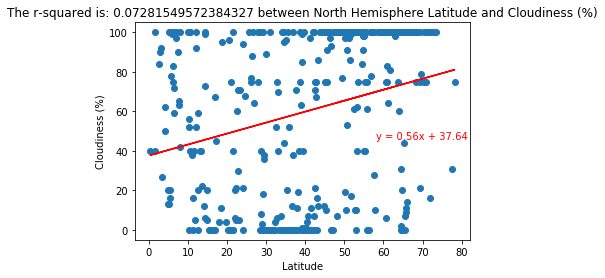

In [31]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = (Northern_lat)
y_values = (Northern_cloudiness)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(58,46),color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"The r-squared is: {rvalue**2} between North Hemisphere Latitude and Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig9.png", dpi=100)
plt.show()

In [32]:
Southern_lat = southern_hemi_df.iloc[:,1]
Southern_cloudiness = southern_hemi_df.iloc[:,5]
correlation = st.pearsonr(Southern_lat,Southern_cloudiness)
print(f"The correlation between Southern Hemisphere Latitude and Cloudiness (%) is {round(correlation[0],2)}")

The correlation between Southern Hemisphere Latitude and Cloudiness (%) is 0.48


The r-squared is: 0.23281977641178778


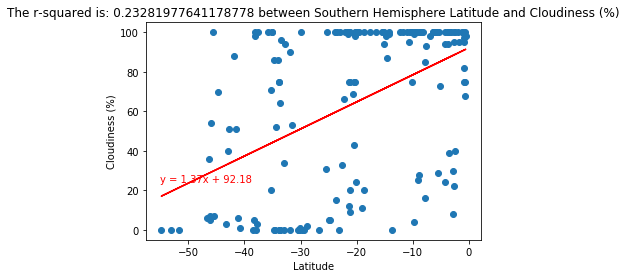

In [33]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = (Southern_lat)
y_values = (Southern_cloudiness)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,24),color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"The r-squared is: {rvalue**2} between Southern Hemisphere Latitude and Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig10.png", dpi=100)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-squared between North Hemisphere Latitude and Cloudiness (%) is: 0.07281549572384327. This value indicates that about ~7% of the values for the dependent variable, Cloudiness (%), are close to the regression line, showing a very weak correlation i.e. as latitude increases North of the equator, Cloudiness (%) increases. 

The r-squared between Southern Hemisphere Latitude and Cloudiness (%) is: 0.23281977641178778. This value indicates that about ~23% of the values for the dependent variable, Cloudiness (%), are close to the regression line, showing a small correlation i.e. as latitude increases South of the equator, Cloudiness (%) decreases. 

### Wind Speed vs. Latitude Linear Regression Plot

In [34]:
Northern_lat = northern_hemi_df.iloc[:,1]
Northern_wind_speed = northern_hemi_df.iloc[:,6]
correlation = st.pearsonr(Northern_lat,Northern_wind_speed)
print(f"The correlation between North Hemisphere Latitude and Wind Speed (m/s) is {round(correlation[0],2)}")

The correlation between North Hemisphere Latitude and Wind Speed (m/s) is -0.0


The r-squared is: 3.425636091896652e-06


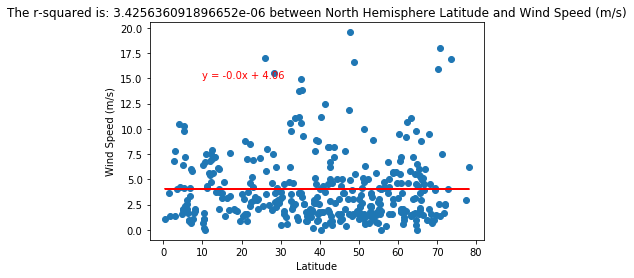

In [35]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = (Northern_lat)
y_values = (Northern_wind_speed)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"The r-squared is: {rvalue**2} between North Hemisphere Latitude and Wind Speed (m/s)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig11.png", dpi=100)
plt.show()

In [36]:
Southern_lat = southern_hemi_df.iloc[:,1]
Southern_wind_speed = southern_hemi_df.iloc[:,6]
correlation = st.pearsonr(Southern_lat,Southern_wind_speed)
print(f"The correlation between Southern Hemisphere Latitude and Wind Speed (m/s) is {round(correlation[0],2)}")

The correlation between Southern Hemisphere Latitude and Wind Speed (m/s) is -0.34


The r-squared is: 0.11301943936898567


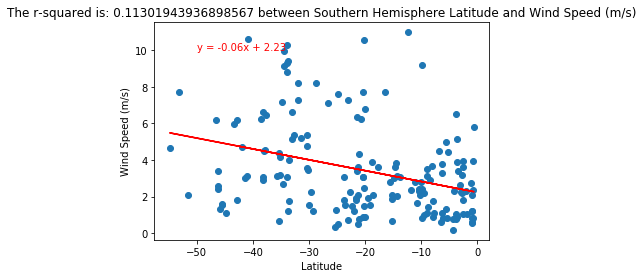

In [37]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = (Southern_lat)
y_values = (Southern_wind_speed)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"The r-squared is: {rvalue**2} between Southern Hemisphere Latitude and Wind Speed (m/s)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig12.png", dpi=500)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-squared between North Hemisphere Latitude and Wind Speed (m/s) is: 3.425636091896652e-06. I am concerned there may be something wrong with the data or scipt for calculating r squared, due to the e-06 at the end of the value and it being greater than 1. Not sure why this is occuring.

The r-squared between Southern Hemisphere Latitude and Wind Speed (m/s) is: 0.11301943936898567. This value indicates that about ~11% of the values for the dependent variable, Wind Speed (m/s), are close to the regression line, showing a small correlation i.e. as latitude increases South of the equator, Wind Speed (m/s) increases. 